## Random Dot Product Graph (RDPG) Correlated Graph Pair

In [13]:
from graspy.simulations.rdpg_corr import rdpg_corr
import numpy as np

RDPG is a latent position generative model, in which the probability of an edge existing between pairs of vertices is determined by the dot product of the associated latent position vectors. In other words, given $X \in \mathbb{R}^{n\times d}$, where $n$ is the number of vertices and $d$ is the dimensionality of each vector, the probability matrix $P$ is given by:

\begin{align*}
P = XX^T
\end{align*}
Below, we sample a RDPG graph pair (undirected and no self-loops) G1 and G2 with the following parameters:
\begin{align*}
n &= [50, 50]\\
r &= 0.3
\end{align*}

In [14]:
X = np.random.dirichlet([10, 10], size=50)
Y = None
r = 0.3
G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)

## Visualize the graphs using heatmap

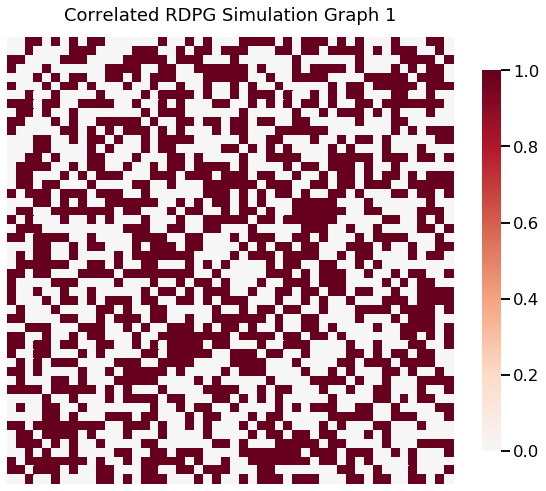

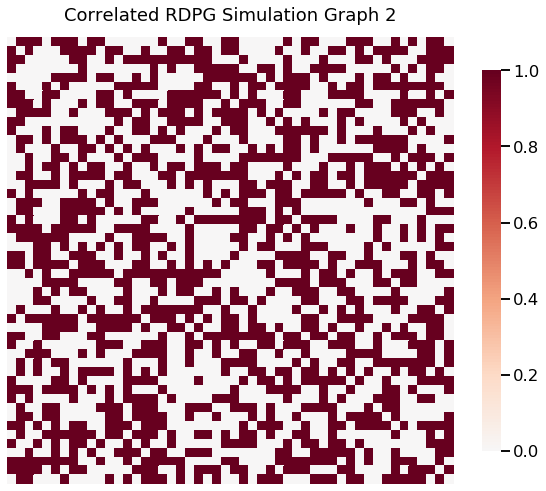

In [15]:
from graspy.plot import heatmap
%matplotlib inline
heatmap(G1, title = 'Correlated RDPG Simulation Graph 1')
heatmap(G2, title = 'Correlated RDPG Simulation Graph 2')